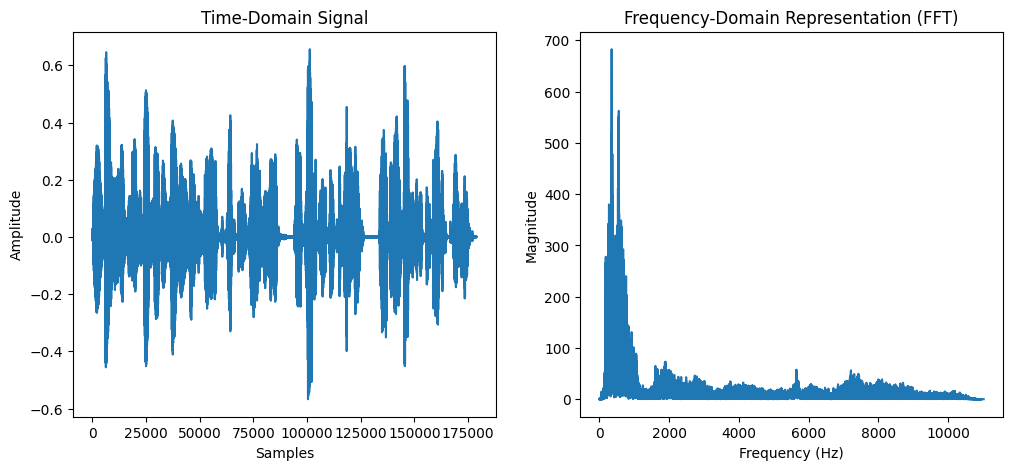

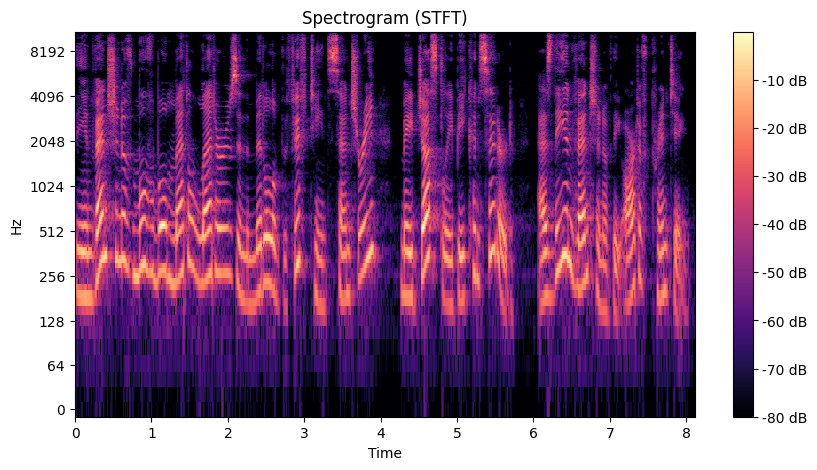

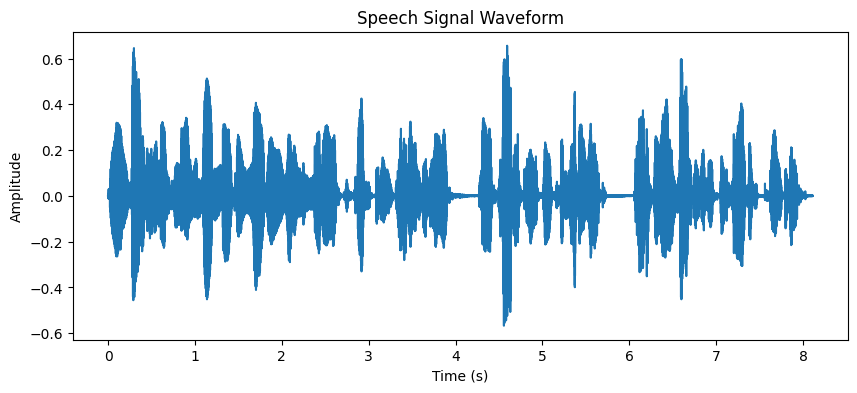

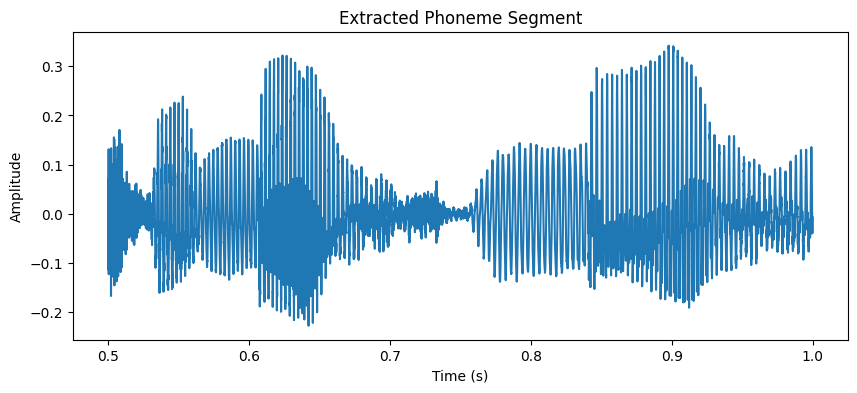

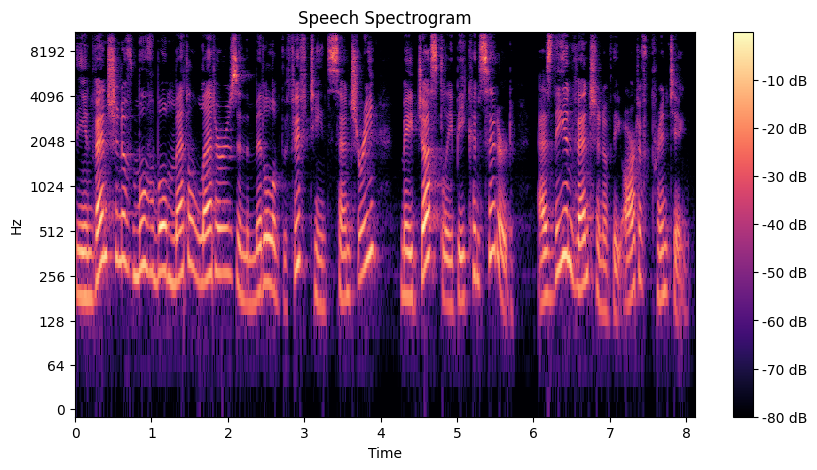

Energy in low-frequency range (Vowels): 883715.81
Energy in high-frequency range (Consonants/Fricatives): 39938.34
Energy ratio (Vowels/Consonants): 22.13


In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

# Load a speech waveform from the LJ Speech dataset
file_path = "C:\\Users\\prana\\Downloads\\LJ001-0005.wav"
signal, sr = librosa.load(file_path, sr=None)

# ---------------- Experiment 1(A): Fourier Transform ------------------
# Compute the Fast fourier transform and plot
fft_spectrum = np.abs(fft(signal))
freqs = np.fft.fftfreq(len(fft_spectrum), 1/sr)

# Plot the time-domain and frequency-domain representations of the signal
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(signal)
plt.title("Time-Domain Signal")
plt.xlabel("Samples")
plt.ylabel("Amplitude")

plt.subplot(1, 2, 2)
plt.plot(freqs[:len(freqs)//2], fft_spectrum[:len(freqs)//2])  # Plot only positive frequencies
plt.title("Frequency-Domain Representation (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

# ---------------- Experiment 1(B): Short-Time Fourier Transform (STFT) ------------------
# Compute STFT
stft_result = librosa.stft(signal, n_fft=1024, hop_length=256, win_length=1024)
# Convert to decibels
db_stft = librosa.amplitude_to_db(np.abs(stft_result), ref=np.max)

# Plot spectrogram
plt.figure(figsize=(10, 5))
librosa.display.specshow(db_stft, sr=sr, hop_length=256, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (STFT)")
plt.show()

# ---------------- Experiment 2: Energy Distribution in Vowels and Consonants ------------------
# Load and visualize a speech signal
signal_trimmed, _ = librosa.effects.trim(signal)  # Remove silence

time = np.linspace(0, len(signal_trimmed) / sr, num=len(signal_trimmed))
plt.figure(figsize=(10, 4))
plt.plot(time, signal_trimmed)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Speech Signal Waveform")
plt.show()

# Extract a phoneme segment (Example: 0.5s to 1.0s)
start_time = 0.5  # in seconds
end_time = 1.0  # in seconds
start_sample = int(start_time * sr)
end_sample = int(end_time * sr)
phoneme_segment = signal_trimmed[start_sample:end_sample]

# Plot the extracted phoneme segment
plt.figure(figsize=(10, 4))
time_phoneme = np.linspace(start_time, end_time, num=len(phoneme_segment))
plt.plot(time_phoneme, phoneme_segment)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Extracted Phoneme Segment")
plt.show()

# Compute STFT
stft_result = librosa.stft(signal_trimmed, n_fft=1024, hop_length=256, win_length=1024)
db_stft = librosa.amplitude_to_db(np.abs(stft_result), ref=np.max)

# Plot spectrogram
plt.figure(figsize=(10, 5))
librosa.display.specshow(db_stft, sr=sr, hop_length=256, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Speech Spectrogram")
plt.show()

# Define frequency bands
low_freq_range = (300, 3000)
high_freq_range = (4000, 8000)

# Compute total energy
energy = np.abs(stft_result) ** 2

# Sum energy in different frequency bands
freq_bins = librosa.fft_frequencies(sr=sr, n_fft=1024)
low_energy = np.sum(energy[(freq_bins >= low_freq_range[0]) & (freq_bins <= low_freq_range[1]), :])
high_energy = np.sum(energy[(freq_bins >= high_freq_range[0]) & (freq_bins <= high_freq_range[1]), :])
energy_ratio = low_energy / high_energy if high_energy != 0 else float('inf')

print(f"Energy in low-frequency range (Vowels): {low_energy:.2f}")
print(f"Energy in high-frequency range (Consonants/Fricatives): {high_energy:.2f}")
print(f"Energy ratio (Vowels/Consonants): {energy_ratio:.2f}")
